```
From: https://github.com/ksatola
Version: 0.1.0
```

# Exploratory Data Analysis (EDA) of PM2.5 

This Exploratory Data Analysis (EDA) covers particulate matter (PM) air pollutants with a special focus on fine particles (PM2.5) which are considered as the most harmful out of all air-pollutants. The measuresements under EDA were taken in Krakow area in the years of 2008-2018.

In [1]:
import pandas as pd 
import numpy as np
#import sqlite3
#from sqlalchemy import create_engine

#import statsmodels.api as sm
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.seasonal import STL
#from statsmodels.tsa.stattools import adfuller
#from pandas.plotting import autocorrelation_plot
#from sklearn.metrics import mean_squared_error

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
# Load the dataset
data_path = '../data/final/'
data_file = data_path + 'dfpm2008_2018.csv'
df = pd.read_csv(data_file, encoding='utf-8', sep=",", index_col="Datetime")
df.head()

,pm10,pm25
Datetime,,
2008-01-01 01:00:00,109.5,92.0
2008-01-01 02:00:00,96.0,81.0
2008-01-01 03:00:00,86.5,73.0
2008-01-01 04:00:00,71.5,60.5
2008-01-01 05:00:00,72.0,61.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96388 entries, 2008-01-01 01:00:00 to 2019-01-01 00:00:00.000
Data columns (total 2 columns):
pm10    96388 non-null float64
pm25    96388 non-null float64
dtypes: float64(2)
memory usage: 2.2+ MB


In [6]:
df.isnull().sum()

pm10    0
pm25    0
dtype: int64

**The data set contains hourly measurements of particulate matter (PM10) and fine particles (PM2.5) taken in Krakow area in the years of 2008-2018. There are 96 388 observations and no missing data.**

In [7]:
df.index

Index(['2008-01-01 01:00:00', '2008-01-01 02:00:00', '2008-01-01 03:00:00',
       '2008-01-01 04:00:00', '2008-01-01 05:00:00', '2008-01-01 06:00:00',
       '2008-01-01 07:00:00', '2008-01-01 08:00:00', '2008-01-01 09:00:00',
       '2008-01-01 10:00:00',
       ...
       '2018-12-31 15:00:00.000', '2018-12-31 16:00:00.000',
       '2018-12-31 17:00:00.000', '2018-12-31 18:00:00.000',
       '2018-12-31 19:00:00.000', '2018-12-31 20:00:00.000',
       '2018-12-31 21:00:00.000', '2018-12-31 22:00:00.000',
       '2018-12-31 23:00:00.000', '2019-01-01 00:00:00.000'],
      dtype='object', name='Datetime', length=96388)

In [8]:
# Convert indextype to DateTime from the generic object type
df.index = pd.to_datetime(df.index)

In [9]:
df.index

DatetimeIndex(['2008-01-01 01:00:00', '2008-01-01 02:00:00',
               '2008-01-01 03:00:00', '2008-01-01 04:00:00',
               '2008-01-01 05:00:00', '2008-01-01 06:00:00',
               '2008-01-01 07:00:00', '2008-01-01 08:00:00',
               '2008-01-01 09:00:00', '2008-01-01 10:00:00',
               ...
               '2018-12-31 15:00:00', '2018-12-31 16:00:00',
               '2018-12-31 17:00:00', '2018-12-31 18:00:00',
               '2018-12-31 19:00:00', '2018-12-31 20:00:00',
               '2018-12-31 21:00:00', '2018-12-31 22:00:00',
               '2018-12-31 23:00:00', '2019-01-01 00:00:00'],
              dtype='datetime64[ns]', name='Datetime', length=96388, freq=None)

In [11]:
# Descriptive summary statistics
df.describe()

,pm10,pm25
count,96388.000000,96388.000000
mean,53.538890,37.196145
std,48.546855,38.605214
min,3.000000,2.500000
25%,23.000000,13.699700
50%,38.000000,24.100000
75%,65.000000,45.000000
max,546.000000,445.000000


In [12]:
df['pm10'].idxmax(), df['pm25'].idxmax()

(Timestamp('2010-01-27 06:00:00'), Timestamp('2010-01-27 06:00:00'))

**The maximum values observed are 546 [µg/m3] for PM10 and 445 [µg/m3] for PM2.5, both on 2010-01-27 at 6am. The mean values are respectively 53 and 37 [µg/m3]. 75% of all observations are below 65 and 45 [µg/m3]. Almost 75% of PM10 and almost 50% of PM2.5 observations exeed WHO air quiality guidelines (20 [µg/m3] for PM10 and 25 [µg/m3] for PM2.5).**

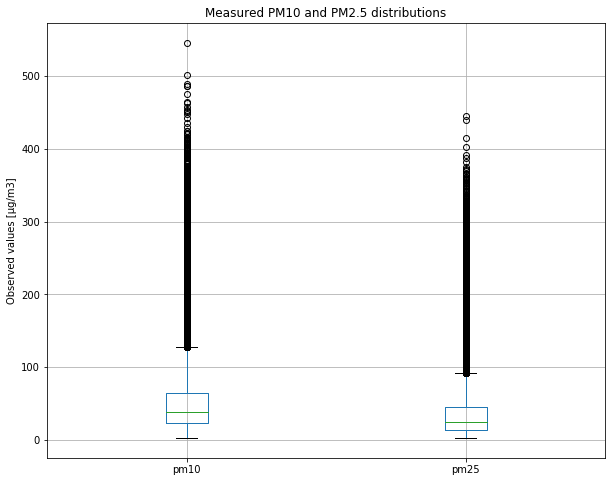

In [15]:
df.boxplot(grid=True, figsize=(10, 8))
plt.title('Measured PM10 and PM2.5 distributions')
plt.ylabel('Observed values [µg/m3]')
plt.savefig('images/eda_pm_dists.png')
plt.show();

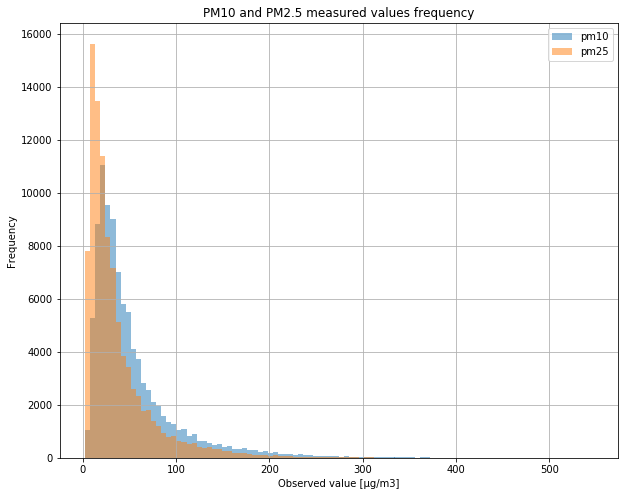

In [16]:
df.plot(kind='hist', bins=100, grid=True, figsize=(10, 8), alpha=0.5)
plt.title('PM10 and PM2.5 measured values frequency')
plt.xlabel('Observed value [µg/m3]')
plt.ylabel('Frequency')
plt.savefig('images/eda_pm_freq.png')
plt.show();

**PM10 and PM2.5 distributions are similar (right-skewed) with many outliers at the high-end many times exeeding WHO and EU air quiality guidelines.**

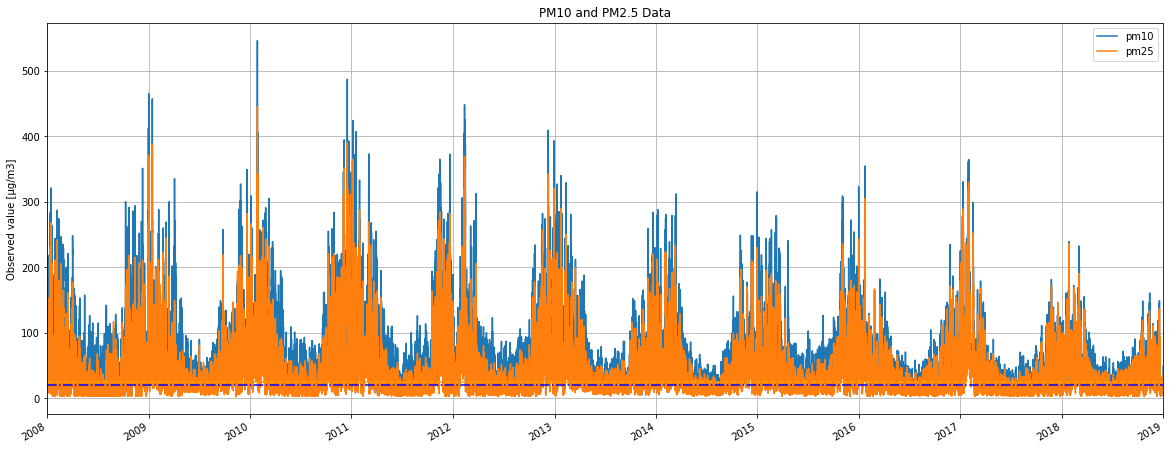

In [18]:
ax = df.plot(grid=True, figsize=(20, 8), alpha=1)
ax.axhline(25, color='orange', linestyle='--')
ax.axhline(20, color='blue', linestyle='-.')
plt.title('PM10 and PM2.5 Data')
plt.ylabel('Observed value [µg/m3]')
plt.xlabel('')
plt.savefig('images/eda_pm_data_representation.png')
plt.show();

**There is yearly seasonality of data with the values increasing from October to April. PM10 and PM2.5 levels are similar and positively correlated. The biggest measurements were taken between 2009 and 2011.**

In [19]:
# Mean of PM10, PM2.5 in 2008
m2008 = df['2008'].mean()
m2008

pm10    58.658482
pm25    35.409081
dtype: float64

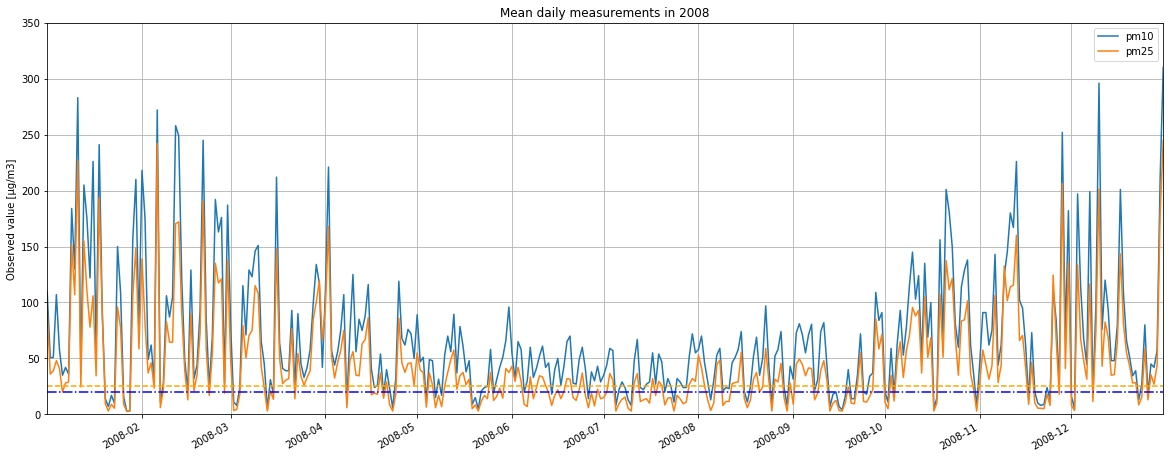

In [24]:
# Mean daily measurements in 2008
ax = df['2008'].asfreq('D').plot(grid=True, figsize=(20, 8))
ax.set_ylim(0, 350)
ax.axhline(25, color='orange', linestyle='--')
ax.axhline(20, color='blue', linestyle='-.')
plt.title('Mean daily measurements in 2008')
plt.ylabel('Observed value [µg/m3]')
plt.xlabel('')
plt.savefig('images/eda_pm_mean_daily_2008.png')
plt.show();

In [25]:
# Mean PM10, PM2.5 in 2018
m2018 = df['2018'].mean()
m2018

pm10    40.703388
pm25    30.840038
dtype: float64

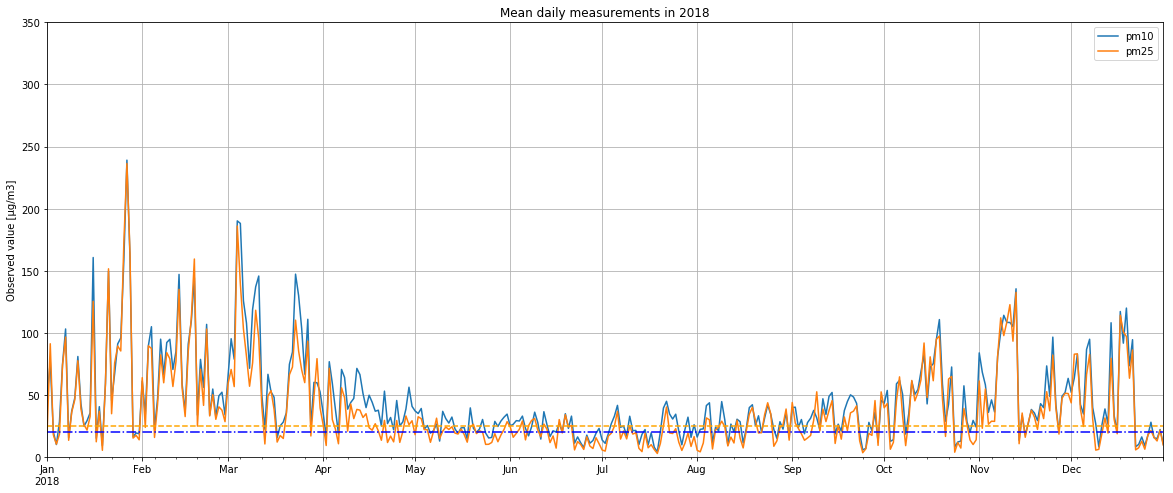

In [26]:
# And in 2018
ax = df['2018'].asfreq('D').plot(grid=True, figsize=(20, 8))
ax.set_ylim(0, 350)
ax.axhline(25, color='orange', linestyle='--')
ax.axhline(20, color='blue', linestyle='-.')
plt.title('Mean daily measurements in 2018')
plt.ylabel('Observed value [µg/m3]')
plt.xlabel('')
plt.savefig('images/eda_pm_mean_daily_2018.png')
plt.show();

**The characteristics of measurements look similar in all years (above checked the edge cases - 2008 and 2018). In autumn and winter, there are more air pollutants in the air then during the rest of the year. Looking at the vertical axes (the scale is scaled to be the same) we can clearly see, that situation improved - the maximum values observed are lower in 2018 comparing to 2008 but still not at the satisfactory level.**

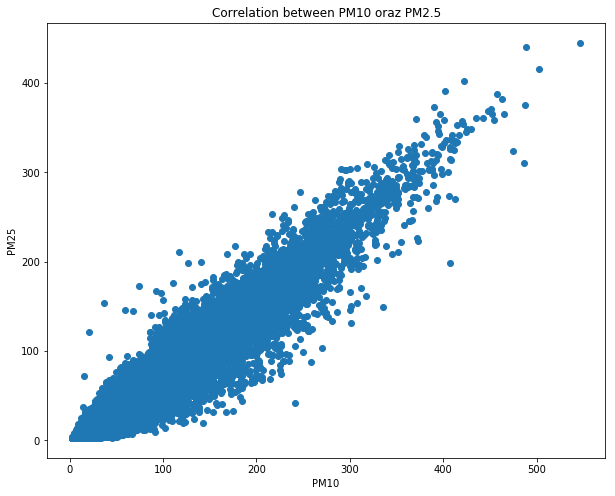

In [27]:
# Is there any linear relationship between PM10 i PM2.5?
plt.figure(figsize=(10, 8))
plt.title("Correlation between PM10 oraz PM2.5")
plt.xlabel('PM10')
plt.ylabel('PM25')
plt.savefig('images/eda_pm_corr.png')
plt.scatter(df['pm10'], df['pm25']);

**There is indeed a linear positive and strong correlation between PM10 and PM2.5.**

In [28]:
corr = df['pm10'].corr(df['pm25'])
print("PM10 and PM2.5 correlation coefficient: ", corr)

PM10 and PM2.5 correlation coefficient:  0.9639339988579074


**The Pearson's correlation coefficient is quite high (the maximum value is 1.0). This should not be surprising as PM2.5 is contained in PM10.**

### Question 1
**Jakie byly roczne srednie stezenia poziomow pylow zawieszonych w Krakowie?**

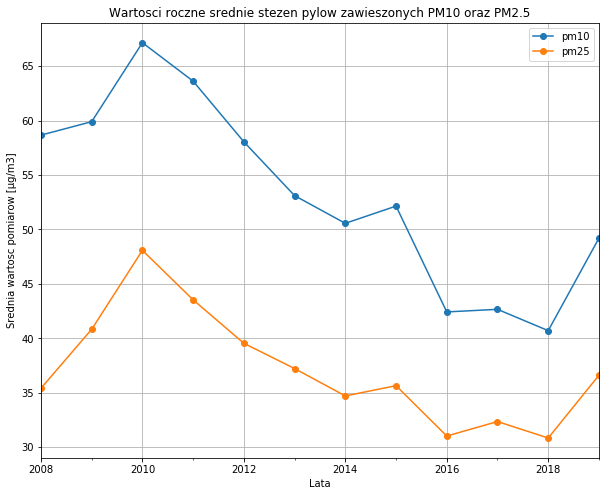

In [27]:
# Roczna srednia
dfts = df.resample(rule='A').mean()
dfts.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Wartosci roczne srednie stezen pylow zawieszonych PM10 oraz PM2.5')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('Lata')
plt.show();

In [28]:
# Inna metoda
index_year = df.index.year
mean_by_year = df.groupby(index_year).mean()
mean_by_year

,pm10,pm25
Datetime,,
2008,58.658482,35.409081
2009,59.894241,40.826877
2010,67.148990,48.076949
2011,63.615723,43.532485
2012,58.044864,39.541272
2013,53.102708,37.220781
2014,50.559304,34.705822
2015,52.142013,35.649061
2016,42.422487,31.024153


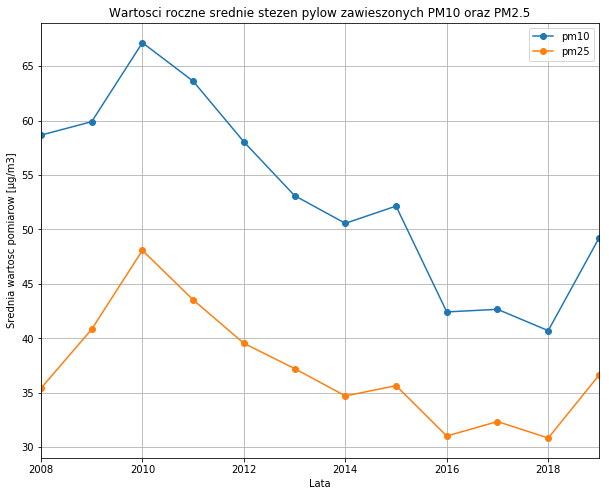

In [29]:
mean_by_year.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Wartosci roczne srednie stezen pylow zawieszonych PM10 oraz PM2.5')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('Lata')
plt.show();

**W roku 2010 w Krakowie zaobserwowano rekordowe srednie dzienne wartosci stezen pylow zawieszonych. W latach kolejnych sytuacja zaczela sie poprawiac. Jednak w roku 2018 zaobserwowac mozna ponowny wzrost ilosci pylow zawieszonych w powietrzu.**

### Pytanie 2
**W jaki sposob ksztaltuje sie zmiennosc wartosci maksymalnych, minimalnych i mediany na przestrzeni lat dla PM2.5?**

In [30]:
dfts = df['pm25'].resample(rule='D').mean().to_frame()
rolling = dfts.pm25.rolling(360)
dfts['q10'] = rolling.quantile(0.1)
dfts['q50'] = rolling.quantile(0.5)
dfts['q90'] = rolling.quantile(0.9)
dfts.head()

,pm25,q10,q50,q90
Datetime,,,,
2008-01-01,53.586957,NaN,NaN,NaN
2008-01-02,30.958333,NaN,NaN,NaN
2008-01-03,46.104167,NaN,NaN,NaN
2008-01-04,42.979167,NaN,NaN,NaN
2008-01-05,57.312500,NaN,NaN,NaN


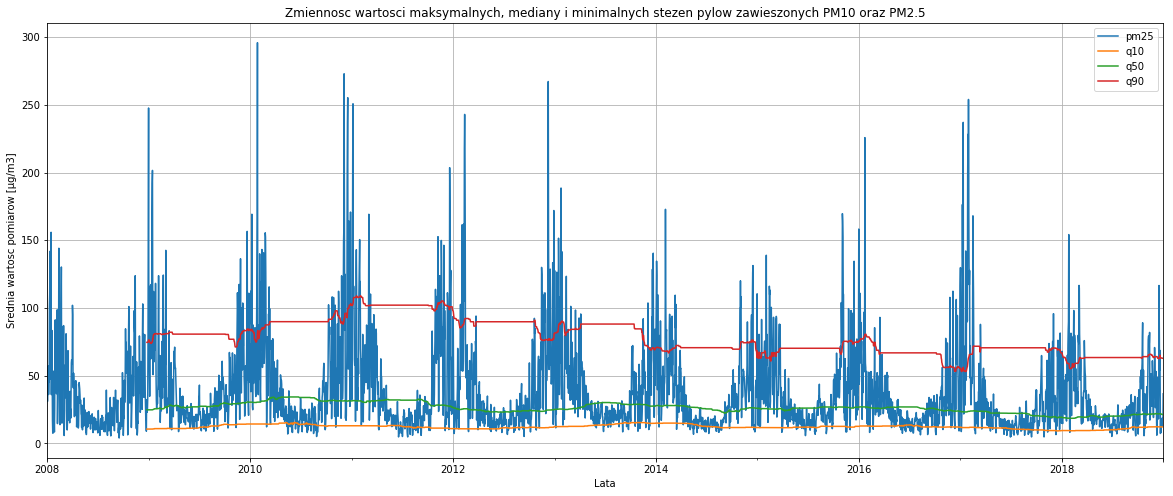

In [31]:
dfts.plot(grid=True, figsize=(20, 8))
plt.title('Zmiennosc wartosci maksymalnych, mediany i minimalnych stezen pylow zawieszonych PM10 oraz PM2.5')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('Lata')
plt.show();

**Za pomoca kwantyli kroczacych (obejmujacych 360 dni) 10%, 50% (mediana) i 90% mozna zwizualizowac trendy zmiennosci wartosci maksymalnych, minimalnych i mediany. Jak widac, roczne maksymalne wartosci obserwowanych zanieczyszczen systematycznie spadaja, natomiast mediana i wartosci niskie pozostaja na podobnym poziomie.**

### Pytanie 3
**Jak ksztaltowaly sie sredniomiesieczne poziomy pylow zawieszonych na przelomie 2017 oraz 2018?**

In [32]:
dfts = df['2017-10':'2018-4'].resample(rule='M').mean()

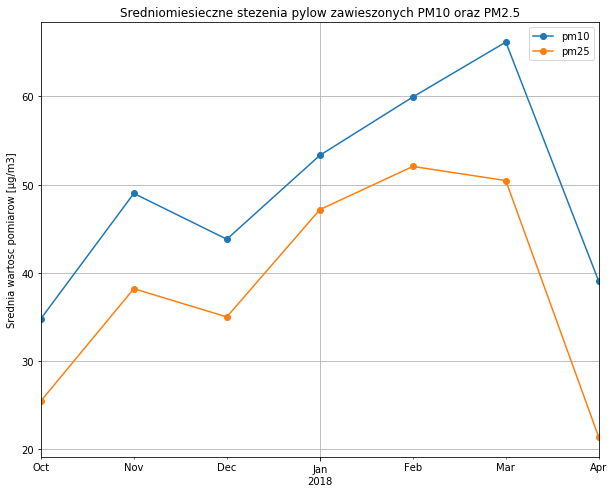

In [33]:
dfts.plot(grid=True, figsize=(10, 8), marker='o')
plt.title('Sredniomiesieczne stezenia pylow zawieszonych PM10 oraz PM2.5')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('')
plt.show();

### Pytanie 4
**W jakich godzinach nalezy spodziewac sie najwiekszego sredniego stezenia pylow zawieszonych w powietrzu?**

In [34]:
index_hour = df.index.hour
mean_by_hour = df.groupby(index_hour).mean()
mean_by_hour

,pm10,pm25
Datetime,,
0,65.142781,48.841168
1,62.239097,47.202120
2,58.849983,44.983076
3,55.637367,42.564447
4,53.086791,40.324473
5,52.555740,39.261994
6,53.447625,38.949145
7,54.969955,38.525071
8,55.829887,37.592334


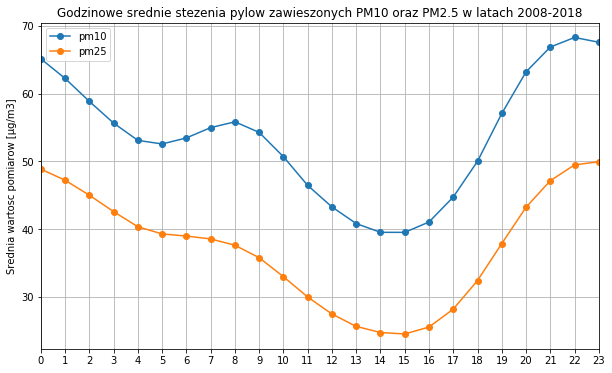

In [35]:
mean_by_hour.plot(grid=True, figsize=(10, 6), marker='o')
plt.xticks(mean_by_hour.index)
plt.title('Godzinowe srednie stezenia pylow zawieszonych PM10 oraz PM2.5 w latach 2008-2018')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('')
plt.show();

**Najwyzsze zanieczyszczenie powietrza obserwowano w godzinach nocnych, najnizsze miedzy godz. 14:00 i 15:00.**

### Pytanie 5
**W ktore dni tygodnia nalezy spodziewac sie najwiekszego sredniego stezenia pylow zawieszonych w powietrzu?**

In [36]:
# Poniedzialek = 0
index_dayofweek = df.index.dayofweek
mean_by_dayofweek = df.groupby(index_dayofweek).mean()
mean_by_dayofweek

,pm10,pm25
Datetime,,
0,50.658805,34.724517
1,57.097404,39.140010
2,56.142090,38.327821
3,54.994405,37.513760
4,55.690797,38.219692
5,52.079464,37.304929
6,48.113621,35.144516


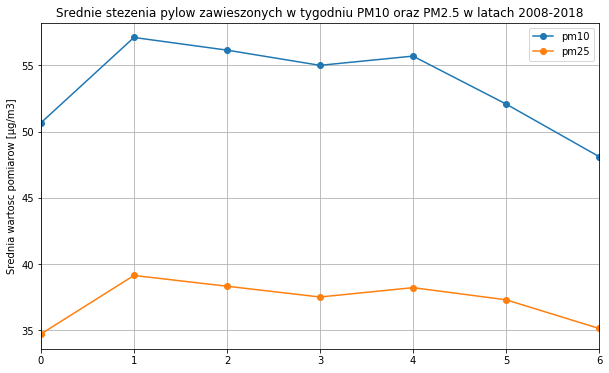

In [37]:
mean_by_dayofweek.plot(grid=True, figsize=(10, 6), marker='o')
plt.title('Srednie stezenia pylow zawieszonych w tygodniu PM10 oraz PM2.5 w latach 2008-2018')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('')
plt.show();

**Poziom zanieczyszczenia jest srednio najwiekszy we wtorki (1), potem spada by osiagnac najnizsza srednia wartosc w niedziele (6).**

### Pytanie 6
**W ktorych miesiacach oddychamy najmniej zanieczyszczonym powietrzem?**

In [38]:
index_month = df.index.month
mean_by_month = df.groupby(index_month).mean()
mean_by_month

,pm10,pm25
Datetime,,
1,85.717663,65.816152
2,83.228053,61.435132
3,66.571877,45.508039
4,49.623295,30.178337
5,32.044806,19.652018
6,27.986224,16.111411
7,27.395191,15.589625
8,31.676381,18.871177
9,35.896588,23.145553


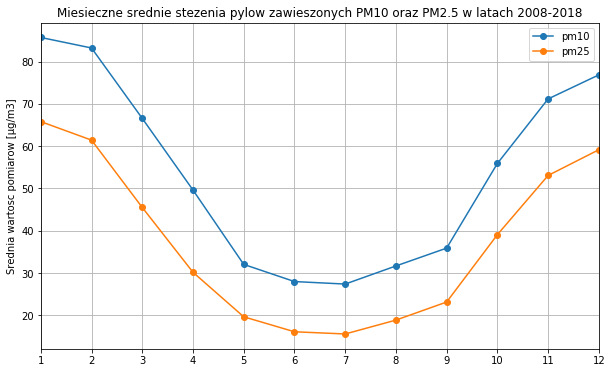

In [39]:
mean_by_month.plot(grid=True, figsize=(10, 6), marker='o')
plt.xticks(mean_by_month.index)
plt.title('Miesieczne srednie stezenia pylow zawieszonych PM10 oraz PM2.5 w latach 2008-2018')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('')
plt.show();

**W okresie od maja do wrzesnia powietrze w Krakowie jest najczystrze.**

### Pytanie 7
**Jak ksztaltowaly sie poziomy zanieczyszczen w kolejnych latach (PM2.5)?**

In [40]:
years = range(2008, 2019)
df_years = pd.DataFrame()
for year in years:
    df_year = df.loc[str(year), ['pm25']].reset_index(drop=True)
    df_year.rename(columns={'pm25': year}, inplace=True)
    df_years = pd.concat([df_years, df_year], axis=1)

In [41]:
df_years.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,92.0,334.5,69.0,54.0,112.0,77.0,76.0,65.0,215.8730,119.915,21.34580
1,81.0,276.5,65.0,78.0,148.0,190.0,78.0,73.0,231.4550,177.442,84.90085
2,73.0,133.0,58.0,55.0,132.0,159.0,65.0,54.0,239.8225,178.942,67.44355
3,60.5,78.0,65.0,45.0,118.0,172.5,63.0,50.0,230.2770,174.770,76.66860
4,61.0,51.0,47.0,43.0,122.0,163.0,59.0,51.0,241.3810,154.054,64.96090


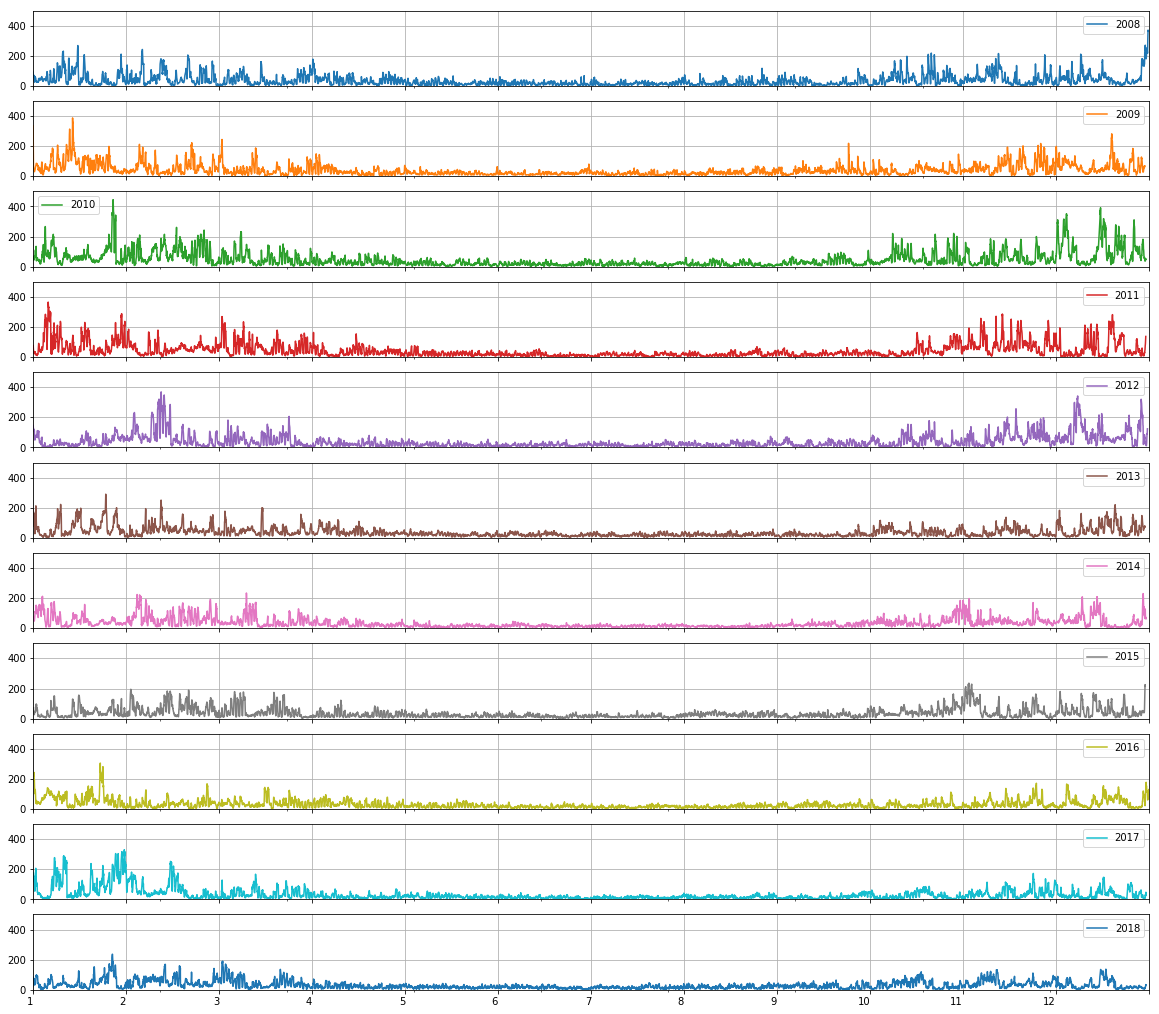

In [42]:
plots = df_years.plot(subplots=True, grid=True, figsize=(20, 20))
for plot in plots:
    plot.set_ylim(0, 500)
    plot.xaxis.set_major_locator(plt.LinearLocator(13))
    plot.set_xticklabels(range(1, 13), rotation=0)
plt.show();

### Pytanie 8
**Czy obserwujemy sezonowe zaleznosci stezenia PM2.5 na przestrzeni lat?**

In [43]:
dfts = df.pm25.copy().to_frame()
dfts['30D'] = dfts.pm25.rolling(window='30D').mean()
dfts['90D'] = dfts.pm25.rolling(window='90D').mean()
dfts.head()

,pm25,30D,90D
Datetime,,,
2008-01-01 01:00:00,92.0,92.000,92.000
2008-01-01 02:00:00,81.0,86.500,86.500
2008-01-01 03:00:00,73.0,82.000,82.000
2008-01-01 04:00:00,60.5,76.625,76.625
2008-01-01 05:00:00,61.0,73.500,73.500


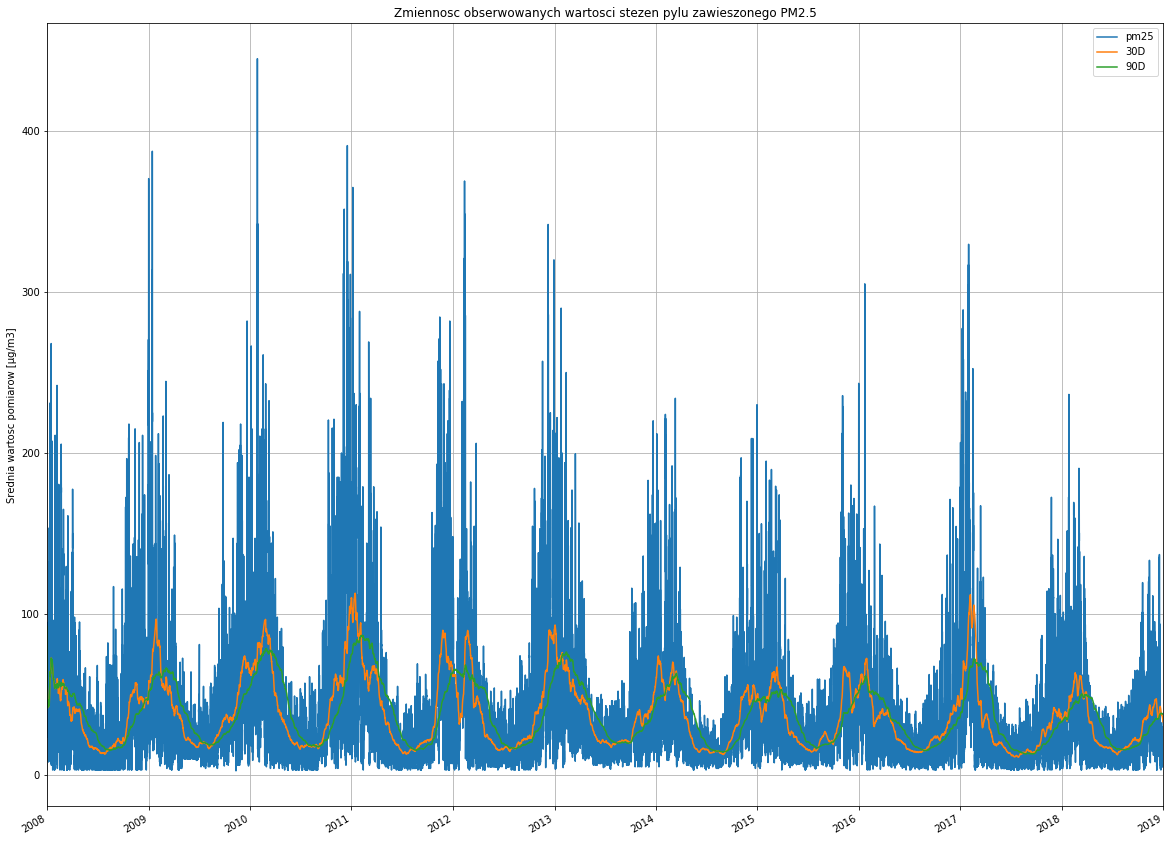

In [44]:
dfts.plot(grid=True, figsize=(20, 16))
plt.title('Zmiennosc obserwowanych wartosci stezen pylu zawieszonego PM2.5')
plt.ylabel('Srednia wartosc pomiarow [µg/m3]')
plt.xlabel('')
plt.show();